<a href="https://colab.research.google.com/github/kavyajeetbora/time_series_deeplearning.ai/blob/main/week1/tsa_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.4.1


## Synthetic Time series

In [38]:
def plot_series(time,series,format="-",start=0,end=None, label=None):
    plt.plot(time[start:end],series[start:end],format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope*time

def seasonal_pattern(season_time):
    return np.cos(season_time * 2 * np.pi)

def seasonality(time, period, amplitude, phase=0):
    season_time = time/period
    return amplitude*seasonal_pattern(season_time)

def noise(time, noise_level=1):
    return noise_level * np.random.randn(len(time))

# def autocorrelation(time, c1):

### seasonality

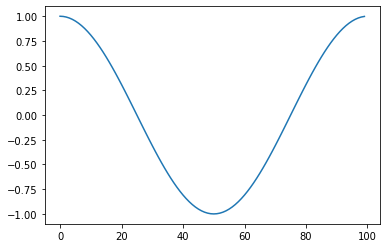

In [ ]:
time = np.arange(0,1,0.01)
plt.plot(seasonal_pattern(time))
plt.show()

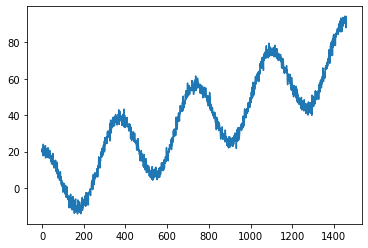

In [17]:
## plotting the time series with seasonality + trend + noise 
time = np.arange(0,365*4+1,1,dtype=float)
series = trend(time,slope=0.05) + seasonality(time, period=365, amplitude=20) + noise(time, noise_level=2)
plt.plot(time,series)
plt.show()

## Splitting the time series into train and test set

total values: 1461


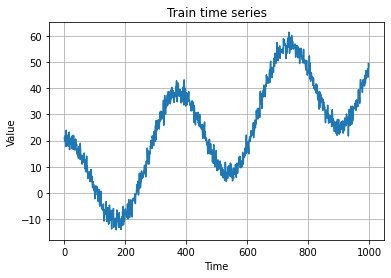

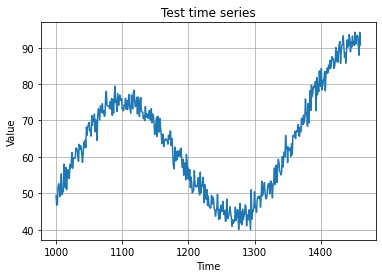

In [27]:
print("total values:",len(series))
split_time = 1000
train_ts = series[:split_time]
train_time = time[:split_time]

test_ts = series[split_time:]
test_time = time[split_time:]

plot_series(time, series, start=0, end=split_time)
plt.title("Train time series")
plt.show()

plot_series(time, series, start=split_time, end=len(time))
plt.title("Test time series")
plt.show()

## Forecasting of time series

Here we will forecast the test series

### Naive forecasting

Prediction of time series at time t is equal to time series value at period t+1.
 
In other words, time series prediction is equal to the time series - 1 

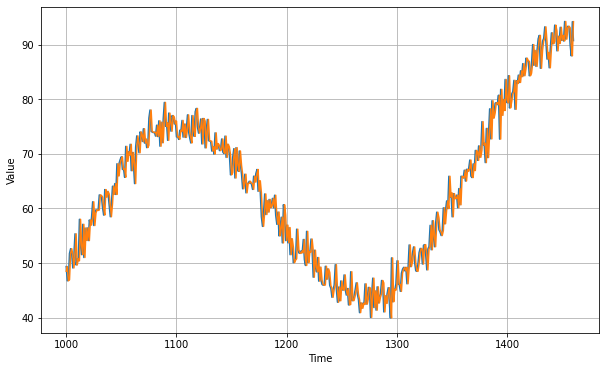

In [34]:
naive_forecast = series[split_time-1:-1]
plt.figure(figsize=(10,6))
plot_series(test_time, test_ts)
plot_series(test_time, naive_forecast)
plt.show()

zooming in the data:

In [55]:
len(naive_forecast), len(test_ts)

(461, 461)

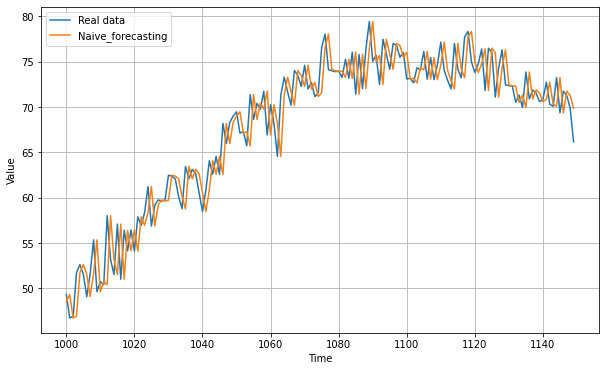

In [39]:
plt.figure(figsize=(10,6))
plot_series(test_time, test_ts,start=0, end=150, label="Real data")
plot_series(test_time, naive_forecast, start=0, end=150, label="Naive_forecasting")
plt.legend()
plt.show()

We can see that the naive forecasting lags by 1 time unit from the blue data.

Now lets compute the error, here we will use mean square error and mean abosolute error from keras library:

In [42]:
print("Mean squared error:", keras.metrics.mean_squared_error(test_ts, naive_forecast).numpy())
print("Mean absolute error:", keras.metrics.mean_absolute_error(test_ts, naive_forecast).numpy())

Mean squared error: 8.66449219956949
Mean absolute error: 2.3748317860573587


This will be our baseline model. Any model having less than this error shall be considered as improvement in forecasting.

### Moving average


It is average value of the last few values of the time series.
if the window is 1 then it is equivalent to naive forecasting
the value at time t is average of some values with a small time called window.

In [49]:
## moving average example
a = [0,1,2,3,4,5,6]
window = 2
for i in range(len(a)-window+1):
    print(np.mean(a[i:i+window]))

0.5
1.5
2.5
3.5
4.5
5.5


In [106]:
def moving_average(time_series, window=30):
    '''
    returns the moving average of the last few values of the given window
    this function will predict from the old time series values
    '''
    ma = []
    for i in range(len(time_series)-window):
        ma.append(np.mean(time_series[i:i+window]))
    return np.array(ma)

def moving_average2(time_series, window=30, center=True):
    '''
    returns the moving average of the last few values of the given window
    '''
    ma = np.zeros(len(time_series))
    ma[:] = np.nan
    center = "True" if 1==1 else "False"
    for i in range(len(time_series)-window+1):
        ma[i+int(window/factor)-1] = np.mean(time_series[i:i+window])
    return ma

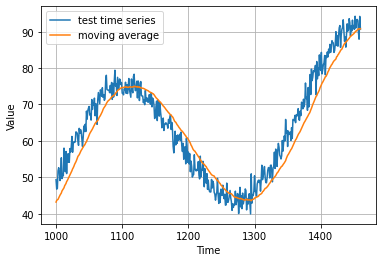

In [107]:
ma = moving_average(series[split_time-30:])
plot_series(test_time, test_ts, label="test time series")
plot_series(test_time, ma, label="moving average")
plt.legend()
plt.show()

In [108]:
print("Mean squared error:", keras.metrics.mean_squared_error(test_ts, ma).numpy())
print("Mean absolute error:", keras.metrics.mean_absolute_error(test_ts, ma).numpy())

Mean squared error: 21.047723181660256
Mean absolute error: 3.9280870894192152


This is worse than the prediction of navie forecasting. Lets remove the seasonality 